In [7]:
import pandas as np 
import numpy as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
data=np.read_csv("C:/Users/JOSHWIN ISAC/OneDrive/Documents/GitHub/Quantum-Computing-project/Quantum_NLP/IMDB_dataset.csv")

In [9]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
label_encoder=LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])

In [14]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [16]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string

[nltk_data] Downloading package stopwords to C:\Users\JOSHWIN
[nltk_data]     ISAC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\JOSHWIN
[nltk_data]     ISAC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
#remove url
def remove_url(text):
  url_pattern=re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'',text)

#Text to lower
def to_lower(text):
  return text.lower()

#remove punctuation
def remove_punc(text):
  translator=str.maketrans('','',string.punctuation)
  return text.translate(translator)

#remove stopwords
def remove_stopwords(text):
  stop_words=set(stopwords.words('english'))
  words=text.split()
  filtered_words=[word for word in words if word not in stop_words]
  return ' '.join(filtered_words)

#remove numbers
def remove_numbers(text):
  return re.sub(r'\d+', '', text)

# Lemmatize text
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

#remove symbols
def remove_symbols(text):
  return re.sub(r'[^\w\s]', '', text)

In [18]:
def preprocess_text(text):
  text=remove_url(text)
  text=to_lower(text)
  text=remove_punc(text)
  text=remove_stopwords(text)
  text=remove_numbers(text)
  text=lemmatize_text(text)
  text=remove_symbols(text)
  return text

#calling the funtion preprocess
data['review']=data['review'].apply(preprocess_text)
data.head(25)

,review,sentiment
0,one reviewer mentioned watching oz episode you...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there family little boy jake think t...,0
4,petter matteis love time money visually stunni...,1
5,probably alltime favorite movie story selfless...,1
6,sure would like see resurrection dated seahunt...,1
7,show amazing fresh innovative idea s first air...,0
8,encouraged positive comment film looking forwa...,0
9,like original gut wrenching laughter like movi...,1


In [20]:
#show the comments after preprocessing in df
data['Cleaned_reviews']=data['review'].apply(remove_url).apply(to_lower).apply(remove_punc).apply(remove_stopwords).apply(remove_numbers).apply(lemmatize_text)
data.head(5)

,review,sentiment,Cleaned_reviews
0,one reviewer mentioned watching oz episode you...,1,one reviewer mentioned watching oz episode you...
1,wonderful little production br br filming tech...,1,wonderful little production br br filming tech...
2,thought wonderful way spend time hot summer we...,1,thought wonderful way spend time hot summer we...
3,basically there family little boy jake think t...,0,basically family little boy jake think zombie ...
4,petter matteis love time money visually stunni...,1,petter matteis love time money visually stunni...


In [31]:
X_train,X_test,y_train,y_test=train_test_split(data['review'],data['sentiment'],test_size=0.2, random_state=42)

In [32]:
vectorizer=TfidfVectorizer(max_features=100)
features = vectorizer.fit_transform(data['Cleaned_reviews']).toarray()
print(features)

[[0.         0.         0.         ... 0.1144768  0.         0.        ]
 [0.         0.16063599 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.16557483 0.20089626]
 ...
 [0.1572673  0.         0.         ... 0.13161938 0.         0.        ]
 [0.         0.         0.         ... 0.16156238 0.         0.        ]
 [0.         0.         0.         ... 0.11756074 0.         0.        ]]


In [40]:
# Vectorize and split features and labels
X_train_vec = vectorizer.transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()



In [43]:
def pad_to_power_of_two(feature_vector):
    next_power_of_2 = 2**int(np.ceil(np.log2(len(feature_vector))))
    padded_vector = np.zeros(next_power_of_2)
    padded_vector[:len(feature_vector)] = feature_vector
    return padded_vector

# Example for the first feature vector
padded_feature = pad_to_power_of_two(X_train_vec[0])
print(f"Padded vector length: {len(padded_feature)}")


Padded vector length: 128


In [44]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 64
pca = PCA(n_components=64)
X_train_pca = pca.fit_transform(X_train_vec)
X_test_pca = pca.transform(X_test_vec)


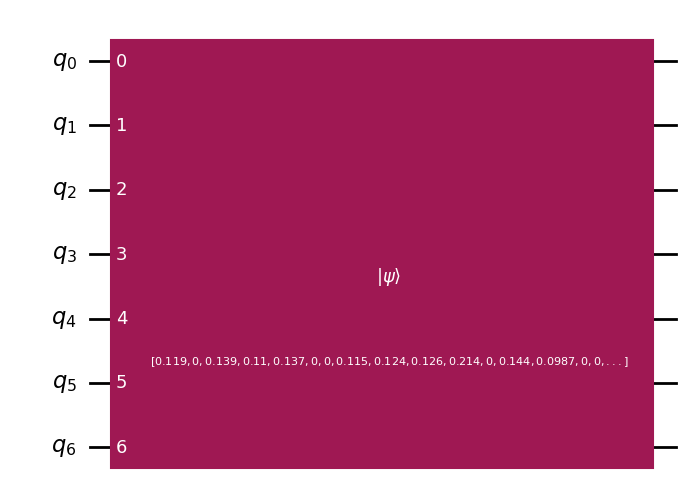

In [48]:
from qiskit import QuantumCircuit
def encode_features(feature_vector):
    n_qubits = int(np.log2(len(feature_vector)))
    qc = QuantumCircuit(n_qubits)

    # Normalize feature vector
    norm = np.linalg.norm(feature_vector)
    normalized_features = feature_vector / norm

    # Encode as amplitudes
    qc.initialize(normalized_features, range(n_qubits))
    return qc

# Encode a padded or reduced feature vector
encoded_circuit = encode_features(padded_feature)  # or X_train_pca[0] if using PCA
display(encoded_circuit.draw(output="mpl"))



In [27]:
# from dotenv import load_dotenv
# import os 
# from googleapiclient.discovery import build
# from googleapiclient.errors import HttpError
# api_key=os.getenv('YOOUTUBE_API_KEY')
# youtube=build('youtube','v3',developerKey='api_key')